# V- Nettoyage des données d'entrainement

            1) Traitement des valeurs manquantes 
Un de travail les plus importants est l’étude des valeurs manquantes, détecter les valeurs manquantes et les remplacer est primordial pour construire un jeu des données de qualité, nécessaire pour l’étude statistique ainsi que pour entraîner un classeur.

             On visualise les données manquantes:

In [21]:
df_clean.isnull().sum()

Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Arrival Delay in Minutes             310
satisfaction                           0
dtype: int64

On remarque que il y'a **310 valeurs manquantes** seulement pour la variable **Arrival Delay in Minutes**.

              Gestion des valeurs manquantes
Deux façons qu'on peut faire pour remplacer les valeurs manquantes:
*   Soit par le retard de minute qui la fréquence  la plus élevé.
*   Soit par la médiane.


In [22]:
retard_frequent = df_clean['Arrival Delay in Minutes'].value_counts()/df_clean.shape[0]*100  # Pour la frequence
mediane_retard = df_clean['Arrival Delay in Minutes'].median()                      # Pour la mediane
print("   Les frequance des retards sont:\n",retard_frequent )
print("\n La mediane de minuites de retards des vols est egale à:\n", mediane_retard)

   Les frequance des retards sont:
 0.0      55.973783
1.0       2.127926
2.0       1.986449
3.0       1.878657
4.0       1.835348
           ...    
458.0     0.000962
729.0     0.000962
382.0     0.000962
459.0     0.000962
369.0     0.000962
Name: Arrival Delay in Minutes, Length: 455, dtype: float64

 La mediane de minuites de retards des vols est egale à:
 0.0


Plus grande fréquence de retard: on a **55% des vols** qui n'ont pas fait des retard, **fréquence de 0.0 min**.
On remplace les **valeurs manquantes** par la **médiane** ou par la valeur de **minutes de retard** le plus fréquenté, elles sont toutes les deux égale à **0.0**

In [24]:
df_clean_value_manquant = df_clean.copy()
df_clean_value_manquant['Arrival Delay in Minutes'] = df_clean_value_manquant['Arrival Delay in Minutes'].fillna(mediane_retard)
df_clean_value_manquant.isnull().sum()

Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64

             2) Transformation des variables types 'objec' en variables types 'int'
Les variables 
```
['Gender', 'Customer Type', 'Type of Travel', 'Class', 'satisfaction']
```
sont des types chaînes des caractères, alors que on aura besoin de les utiliser pour l'application du classeur **KNN**. Le classeur **KNN** recommande des variables des types **int** pour la calcul des **distance des K plus proches voisins**.

In [25]:
df_clean_value_manquant['Gender'] = df_clean_value_manquant['Gender'].map({'Male' : 0, 'Female' : 1})
df_clean_value_manquant['Customer Type'] = df_clean_value_manquant['Customer Type'].map({'Loyal Customer' : 0, 'disloyal Customer' : 1})
df_clean_value_manquant['Type of Travel'] = df_clean_value_manquant['Type of Travel'].map({'Personal Travel' : 0, 'Business travel' : 1})
df_clean_value_manquant['Class'] = df_clean_value_manquant['Class'].map({'Business' : 2, 'Eco Plus' : 1, 'Eco' : 0})
df_clean_value_manquant['satisfaction'] = df_clean_value_manquant['satisfaction'].map({'neutral or dissatisfied' : 0, 'satisfied' : 1})


verifions que les variables ont bien été converties:

In [26]:
df_clean_value_manquant.dtypes

Gender                                 int64
Customer Type                          int64
Age                                    int64
Type of Travel                         int64
Class                                  int64
Flight Distance                        int64
Inflight wifi service                  int64
Departure/Arrival time convenient      int64
Ease of Online booking                 int64
Gate location                          int64
Food and drink                         int64
Online boarding                        int64
Seat comfort                           int64
Inflight entertainment                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Inflight service                       int64
Cleanliness                            int64
Arrival Delay in Minutes             float64
satisfaction                           int64
dtype: obj

          3) Valeurs aberrantes
L'étude des valeurs aberrantes peut nous aider à mieux comprendre la diversité des valeurs dans le jeu de donnée, à identifier les causes sous-jacentes, à prévenir les comportements nocifs. Il est important de noter que la suppression de valeurs aberrantes peut avoir un impact significatif sur les résultats de l'analyse, en particulier si les valeurs supprimées représentent une proportion importante de l'échantillon. Par conséquent, il est recommandé d'effectuer une analyse de sensibilité pour évaluer l'impact potentiel de la suppression de ces valeurs sur les résultats de l'analyse.

Comme on l'a explicité tout en haut, le jeu contient des variables catégoriques et 4 variables quantitatives continues:
```
['Age', 'Flight Distance', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']
```
ces derniers sont susceptibles de contenir des valeurs aberrantes. L'une a été supprimer parce que elle était corrélé avec une autre, il s'agit de **Departure Delay in Minutes**. IL nous reste à vérifier les variables  **Arrival Delay in Minutes**, **Flight Distance** et **Age**.

<AxesSubplot:xlabel='Flight Distance'>

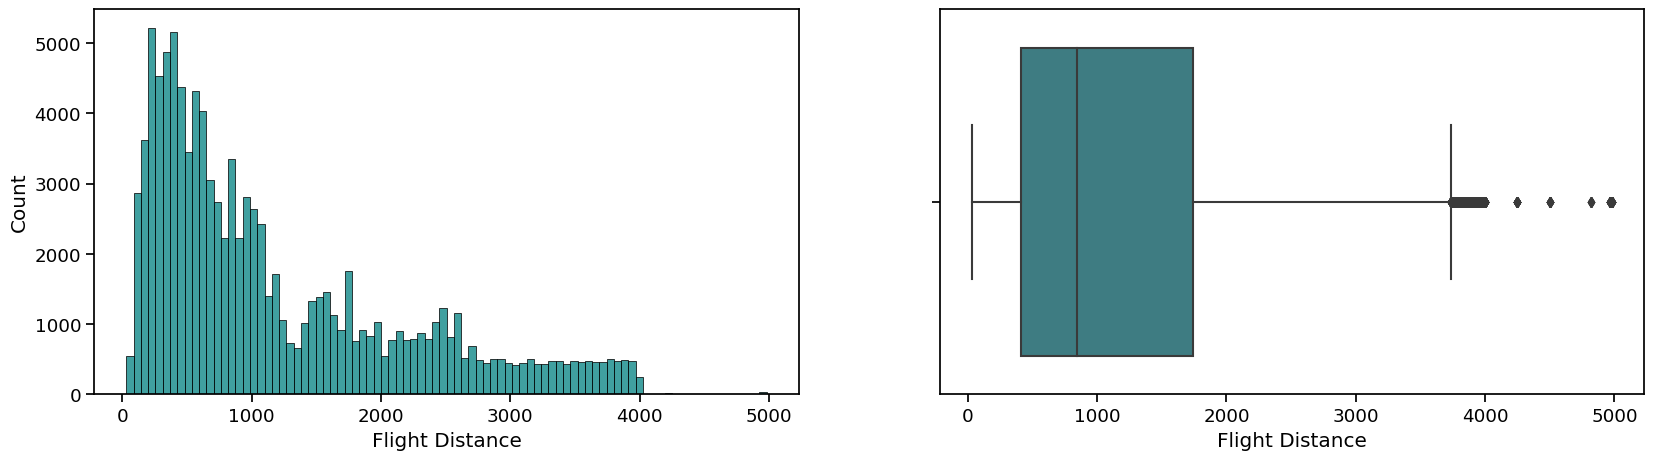

In [27]:
sns.set_context('notebook', font_scale= 1.2)
col = 'Flight Distance'
fig, ax = plt.subplots(1, 2, figsize = (20, 5))
sns.histplot(df_clean_value_manquant[col], ax = ax[0], color= 'teal')
sns.boxplot(x = df_clean_value_manquant[col], ax= ax[1], palette= 'crest')

Avec le boxplot, on aperçoit de valeurs qui nous semblent aberrantes. Mais se contenter au boxplot pour en déduire des valeurs aberrantes  peut nous tromper un bon nombre de fois, on utilise alors d'autres méthodes pour détecter les valeurs aberrantes:

              Distributions des valeurs et méthode de la moyenne ou médiane:
Une méthode courante pour déterminer si une valeur est aberrante consiste à la comparer à la distribution des autres valeurs de l'échantillon. Les valeurs qui sont très éloignées de la moyenne ou de la médiane peuvent être considérées comme aberrantes.

In [28]:
moyenne = df_clean_value_manquant['Flight Distance'].mean()
mediane = df_clean_value_manquant['Flight Distance'].median()
print("La moyenne de distance des vols est egale à:\n", moyenne)
print("La mediane de distance des vols est egale à:\n", mediane)

La moyenne de distance des vols est egale à:
 1189.4483754234677
La mediane de distance des vols est egale à:
 843.0


In [29]:
df_clean_value_manquant.shape

(103904, 22)

In [30]:
Q = df_clean_value_manquant[df_clean_value_manquant['Flight Distance']>4000]
Q.shape

(58, 22)

La **plage des valeurs** qui se trouvent **entre 4000 à 5000km** sont très éloigné de **la médiane 843.0** et de la **moyenne 1189.448375423**, ainsi elles sont **quasiment négligeable pour la distribution des valeurs**. Donc c'est raisonnables de considérer ces plage des valeurs comme des valeurs **rare** donc **aberrantes**.

Une raison de plus et que sur **103904 lignes** de données, seulement **58 lignes** sont des vols dont la **distance de vols est entre 4000 et 5000 km**, cela représente une **proportion très faible de l'échantillon**, soit environ **0,06%**. Dans ce cas, on peut considérer ces a **plage de valeurs 4000 à 5000 km** comme des valeurs rares dans notre jeu de données.

En tout cas, dans la vie réelle, ça aurait du être intéressante si on a plus d'information sur cette compagnie aérienne, peut-être c'est une petite compagnie dont ses vols ne dépassent pas les 4000km en général, et que peut-être des moments particulier certains vols vont plus loin que 4000km mais c'est assez rare. 

Donc des telles information on les a pas, alors on se contente d'ignorer les vols dont la distance est entre 4000 et 5000 km.

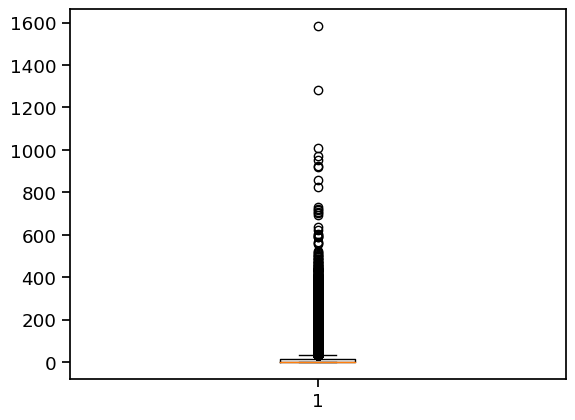

In [31]:
plt.boxplot(df_clean_value_manquant['Arrival Delay in Minutes'])
plt.show()

<AxesSubplot:>

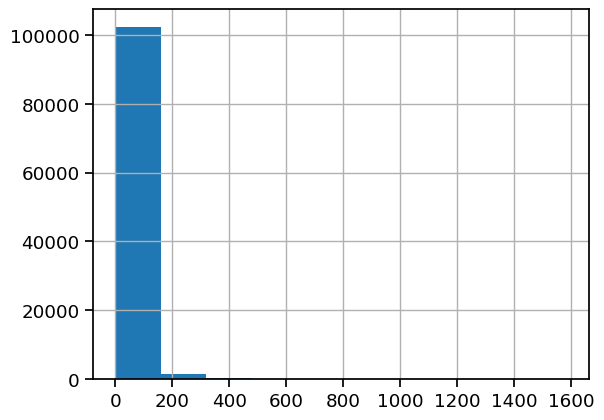

In [32]:
df_clean_value_manquant['Arrival Delay in Minutes'].hist()

In [33]:
m = df_clean_value_manquant[df_clean_value_manquant['Arrival Delay in Minutes']>1000]
m.shape

(3, 22)

De la mème qu'avec **'Flight Distance'**, on supprime les valeur aberrantes pour la variable **'Arrival Delay in Minutes'**. c'est à dire les **retards d'arrivée de plus de 1000 mins**. C'est assez raisonnable puisque on a justes **3 vols qui ont un retards de plus de 1000mins** et aussi en réalité une vols ne peut pas dépasser autant de minutes de retards comme ça.

<AxesSubplot:xlabel='Age'>

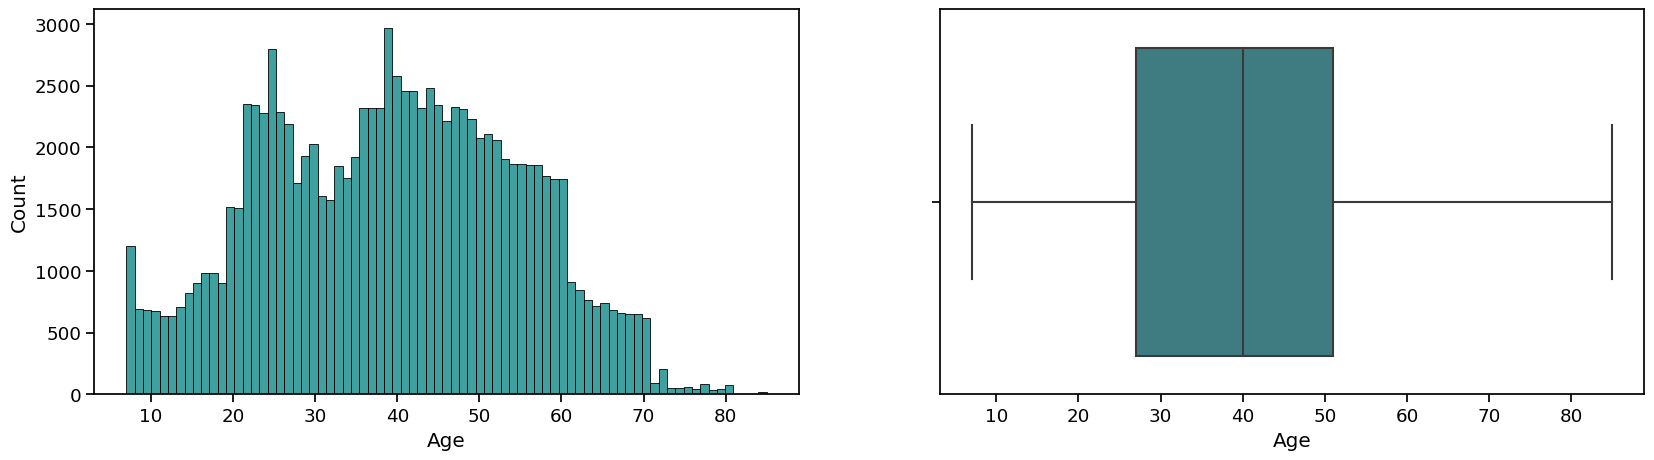

In [34]:
sns.set_context('notebook', font_scale= 1.2)
col = 'Age'
fig, ax = plt.subplots(1, 2, figsize = (20, 5))
sns.histplot(df_clean_value_manquant[col], ax = ax[0], color= 'teal')
sns.boxplot(x = df_clean_value_manquant[col], ax= ax[1], palette= 'crest')

Avec la variable **Age** tout est normal aucune valeur bizarre.

               Nouveau données sans valeurs aberanets ni valeurs manquantes: df_new

In [35]:
df_new = df_clean_value_manquant[(df_clean_value_manquant['Arrival Delay in Minutes'] < 1000) &
                                 (df_clean_value_manquant['Flight Distance'] < 4000)]
df_new.shape

(103832, 22)

         Donc dans 103904 lignes on a supprimer 72 = 103904-1103832, soit 7,02%
         des valeurs supprimer. Donc au cas où on se trompé à la décision de les supprimer, 
         mais cas même on a pas perdu trop d'information.

Donc jusqu'à la ok ! les données d’entraînement sont propres. On examine ainsi les données de test.